In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Dhayanand/Downloads/archive/lightening strikes dataset.csv")
df

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
...,...,...,...
3401007,2018-12-28,30,POINT(-90.6 28.7)
3401008,2018-12-28,30,POINT(-89.4 30.9)
3401009,2018-12-28,30,POINT(-89.5 31.4)
3401010,2018-12-28,30,POINT(-88.3 31.6)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [4]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

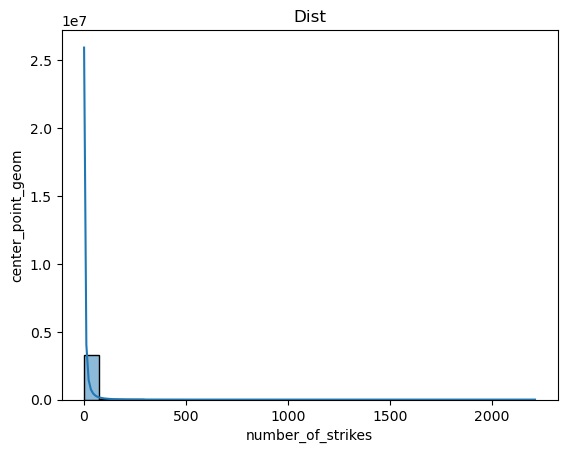

In [6]:
sns.histplot(df['number_of_strikes'], bins=30, kde=True)
plt.title("Dist")
plt.xlabel("number_of_strikes")
plt.ylabel("center_point_geom")
plt.show()

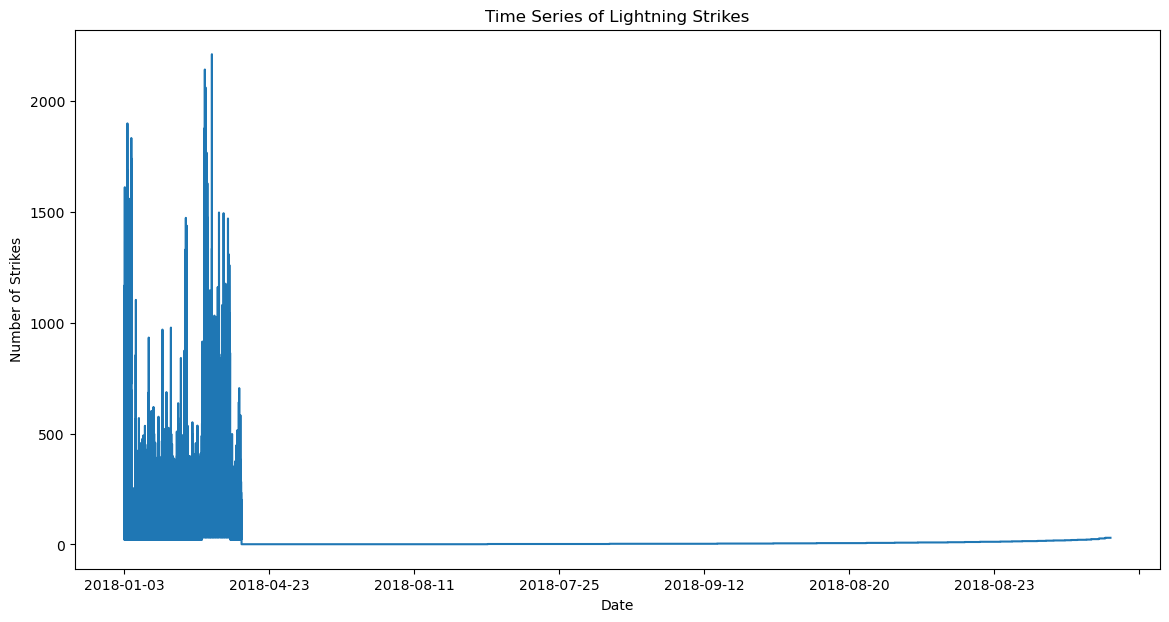

In [7]:
df.set_index('date', inplace=True)
df['number_of_strikes'].plot(figsize=(14, 7))
plt.title('Time Series of Lightning Strikes')
plt.xlabel('Date')
plt.ylabel('Number of Strikes')
plt.show()

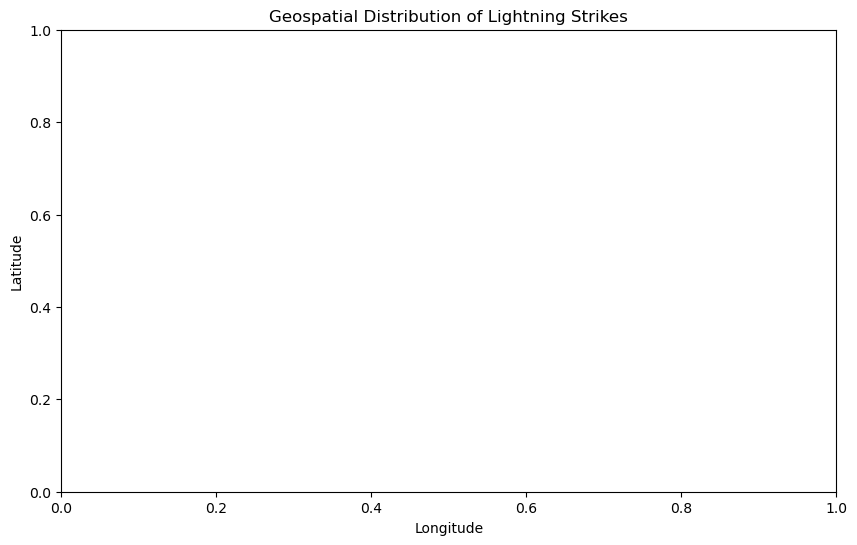

In [8]:
# Extract latitude and longitude from 'center_point_geom'
import re

def extract_lat_long(geom):
    match = re.match(r'POINT \(([-\d.]+) ([-\d.]+)\)', geom)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

df['latitude'], df['longitude'] = zip(*df['center_point_geom'].apply(extract_lat_long))

# Plotting geospatial data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='number_of_strikes', hue='number_of_strikes', data=df, legend=False)
plt.title('Geospatial Distribution of Lightning Strikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()